#Install Library

In [1]:
!pip install contractions
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv
import regex as re
import nltk
import string
import itertools
import tqdm
import unicodedata
import contractions
from nltk.tokenize import word_tokenize
import spacy
import random
import keras
import seaborn as sns
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount("/drive", force_remount=True)
News_data = pd.read_csv('/drive/My Drive/NLP Project/Dataset/crypto_news_headlines.csv',encoding='latin-1', header = None)

Mounted at /drive


In [3]:
# Rename the column
#Assuming 'df' is the DataFrame containing the 'All Headlines' column
News_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       136 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [4]:
News_data.rename(columns={0: 'NewsHeadlines'}, inplace=True)

In [5]:
News_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NewsHeadlines  136 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [6]:
News_data.head()

,NewsHeadlines
0,All Headlines
1,Bitcoin price dips to $42.2K as Solana comes o...
2,The buzz of 2023: Top 10 most popular news sto...
3,"Grayscale execs Barry Silbert, Mark Murphy qui..."
4,Bitcoin and the NFL  why athletes are turning...


In [7]:
# Check for missing values
print(News_data.isnull().sum())

NewsHeadlines    0
dtype: int64


In [8]:
import nltk
import re
import unicodedata
import contractions
import tqdm
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stopwords_list = nltk.corpus.stopwords.words('english')

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    clean_text = soup.get_text()
    clean_text = re.sub(r'[\r|\n|\r\n]+', '\n', clean_text)
    return clean_text

def remove_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_stopwords(words):
    return [word for word in words if word not in stopwords_list]

def preprocess_text(text):
    # Case folding
    text = text.lower()
    # Remove HTML tags
    text = remove_html_tags(text)
    text = text.translate(text.maketrans("\n\t\r", "   "))
    # Remove accented characters
    text = remove_accented_characters(text)
    # Expand contractions
    text = contractions.fix(text)
    # Remove special characters and non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text, re.I|re.A)
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    text = text.strip()
    # Tokenize
    text = word_tokenize(text)
    # Remove stopwords
    text = remove_stopwords(text)
    return " ".join(text)


# Remove unnecessary rows
unwanted_keywords = ['live wire', 'most read', 'opinion', 'trending in crypto', 'sign up for our newsletters' ,'all headlines']
filtered_headlines = News_data[~News_data['NewsHeadlines'].str.lower().str.contains('|'.join(unwanted_keywords))]

# Apply preprocessing to the filtered headlines
filtered_headlines['CleanedHeadlines'] = filtered_headlines['NewsHeadlines'].apply(preprocess_text)

# Remove all punctuation marks
filtered_headlines['CleanedHeadlines'] = filtered_headlines['CleanedHeadlines'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# Apply preprocessing to 'Headlines' column in 'News_data'
filtered_headlines.head(50)

,NewsHeadlines,CleanedHeadlines
1,Bitcoin price dips to $42.2K as Solana comes o...,bitcoin price dips 422k solana comes 20month h...
2,The buzz of 2023: Top 10 most popular news sto...,buzz 2023 top 10 popular news stories year
3,"Grayscale execs Barry Silbert, Mark Murphy qui...",grayscale execs barry silbert mark murphy quit...
4,Bitcoin and the NFL  why athletes are turning...,bitcoin nfl athletes turning btc investing
5,"Bitcoin hash rate hits new peak, but profitabi...",bitcoin hash rate hits new peak profitability ...
6,Searches for AI on Google smashes Bitcoin an...,searches ai google smashes bitcoin crypto year
7,Reports emerge suggesting Mt. Gox creditors ar...,reports emerge suggesting mt gox creditors rec...
8,Spot Bitcoin ETF inflows could dwarf all 150 c...,spot bitcoin etf inflows could dwarf 150 crypt...
9,"Ethereum ETFs pushed to May, Bitcoin ETFs appr...",ethereum etfs pushed may bitcoin etfs approval...
10,Heres what happened in crypto today,happened crypto today


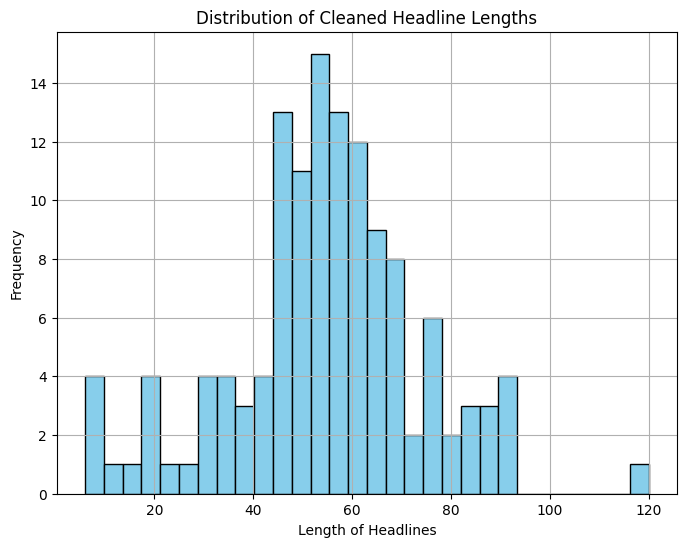

In [10]:
import matplotlib.pyplot as plt

# Assuming 'filtered_headlines' contains the cleaned headlines
headline_lengths = filtered_headlines['CleanedHeadlines'].apply(len)

plt.figure(figsize=(8, 6))
plt.hist(headline_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Cleaned Headline Lengths')
plt.xlabel('Length of Headlines')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [11]:
pip install textblob

In [12]:
from textblob import TextBlob

# Calculate sentiment scores
filtered_headlines['Sentiment_Score'] = filtered_headlines['CleanedHeadlines'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define a function to label sentiments based on scores
def label_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling to the data
filtered_headlines['Sentiment'] = filtered_headlines['Sentiment_Score'].apply(label_sentiment)


# Print counts of positive and negative sentiments
positive_sentiment = filtered_headlines[filtered_headlines['Sentiment'] == 'positive']
negative_sentiment = filtered_headlines[filtered_headlines['Sentiment'] == 'negative']

print("Positive class count:", positive_sentiment.shape[0])
print("Negative class count:", negative_sentiment.shape[0])



Positive class count: 26
Negative class count: 19


In [13]:
# Display the DataFrame with added columns for Sentiment Type and Score
filtered_headlines.head(50)


,NewsHeadlines,CleanedHeadlines,Sentiment_Score,Sentiment
1,Bitcoin price dips to $42.2K as Solana comes o...,bitcoin price dips 422k solana comes 20month h...,0.000000,neutral
2,The buzz of 2023: Top 10 most popular news sto...,buzz 2023 top 10 popular news stories year,0.550000,positive
3,"Grayscale execs Barry Silbert, Mark Murphy qui...",grayscale execs barry silbert mark murphy quit...,0.000000,neutral
4,Bitcoin and the NFL  why athletes are turning...,bitcoin nfl athletes turning btc investing,0.000000,neutral
5,"Bitcoin hash rate hits new peak, but profitabi...",bitcoin hash rate hits new peak profitability ...,0.136364,positive
6,Searches for AI on Google smashes Bitcoin an...,searches ai google smashes bitcoin crypto year,0.000000,neutral
7,Reports emerge suggesting Mt. Gox creditors ar...,reports emerge suggesting mt gox creditors rec...,0.000000,neutral
8,Spot Bitcoin ETF inflows could dwarf all 150 c...,spot bitcoin etf inflows could dwarf 150 crypt...,0.000000,neutral
9,"Ethereum ETFs pushed to May, Bitcoin ETFs appr...",ethereum etfs pushed may bitcoin etfs approval...,0.000000,neutral
10,Heres what happened in crypto today,happened crypto today,0.000000,neutral


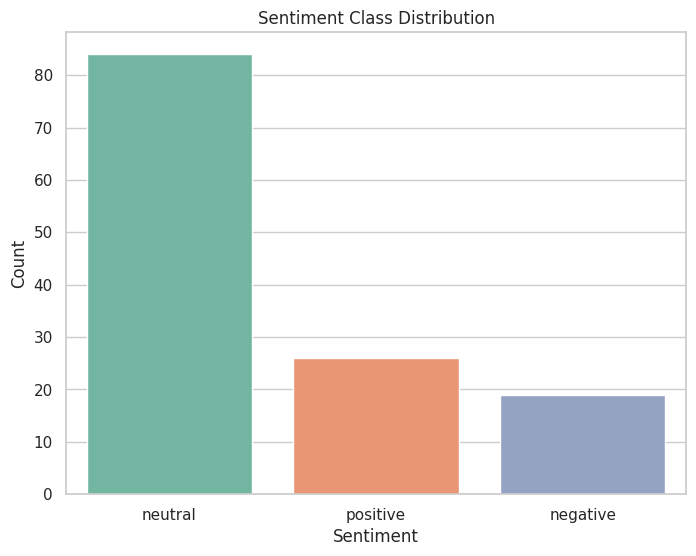

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Count of each sentiment class
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=filtered_headlines, palette='Set2')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



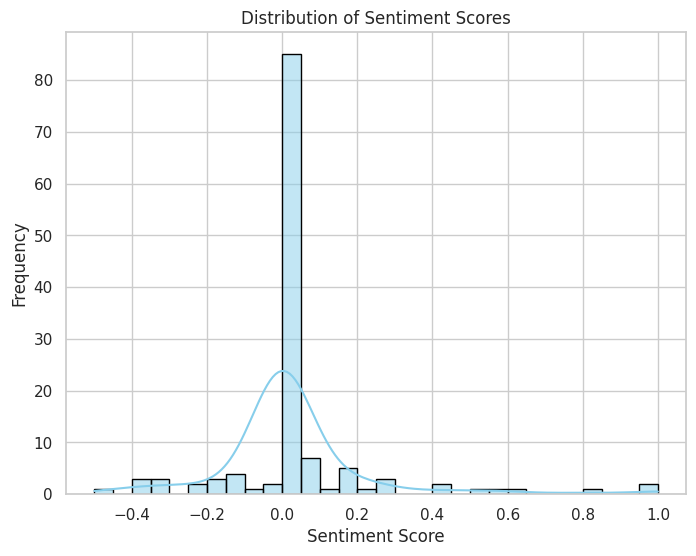

In [15]:
# Visualizing sentiment scores with improved aesthetics
plt.figure(figsize=(8, 6))
sns.histplot(filtered_headlines['Sentiment_Score'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()



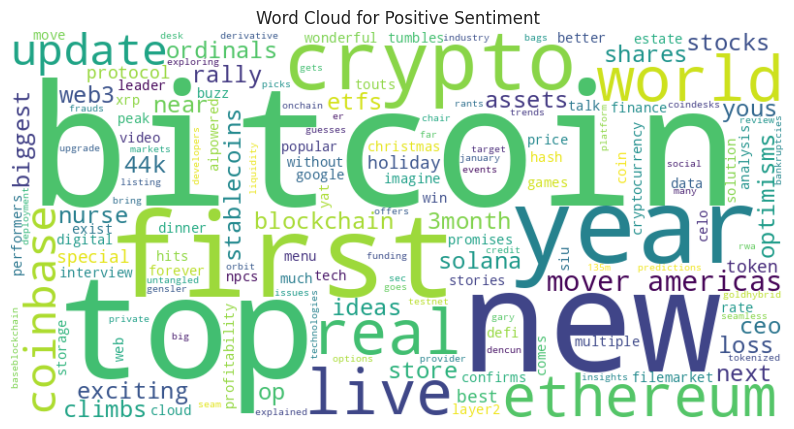

In [16]:
from wordcloud import WordCloud

# Combine headlines for positive sentiment
positive_text = ' '.join(filtered_headlines[filtered_headlines['Sentiment'] == 'positive']['CleanedHeadlines'])

# Generate word cloud for positive sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud for positive sentiment
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


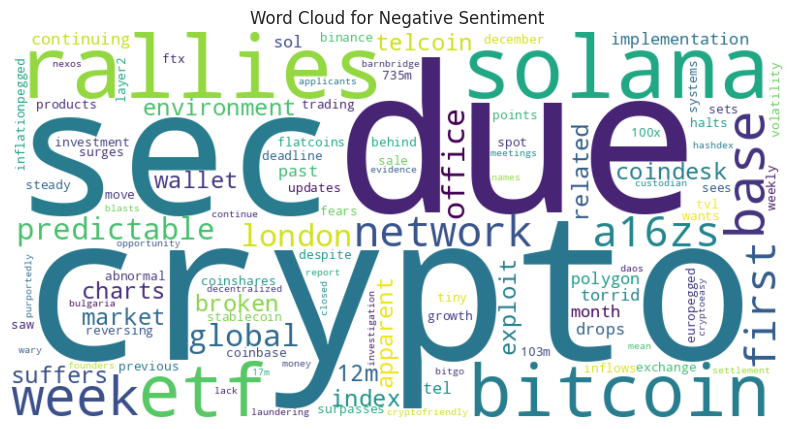

In [17]:
# Combine headlines for negative sentiment
negative_text = ' '.join(filtered_headlines[filtered_headlines['Sentiment'] == 'negative']['CleanedHeadlines'])

# Generate word cloud for negative sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud for negative sentiment
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()


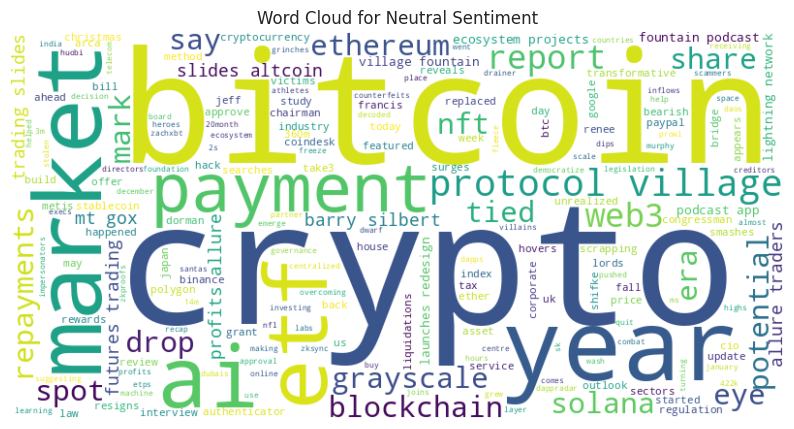

In [18]:
# Combine headlines for neutral sentiment
neutral_text = ' '.join(filtered_headlines[filtered_headlines['Sentiment'] == 'neutral']['CleanedHeadlines'])

# Generate word cloud for neutral sentiment
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display the word cloud for neutral sentiment
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Splitting into train and test sets
X = filtered_headlines['CleanedHeadlines'].values
y = filtered_headlines['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tokenization
token = Tokenizer()
token.fit_on_texts(X_train)
vocab = len(token.index_word) + 1
print("Vocabulary size={}".format(len(token.word_index)))
print("Number of Documents={}".format(token.document_count))

# Padding
MAX_SEQUENCE_LENGTH = 30
X_train = token.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_test = token.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Label Encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Vocabulary size=464
Number of Documents=90
Shape of X_train: (90, 30)
Shape of X_test: (39, 30)
Shape of y_train: (90,)
Shape of y_test: (39,)


In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Random Forest Classifier Metrics:")
print(classification_report(y_test, rf_predictions))
# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, rf_predictions) * 100

# Format accuracy to two decimal places
formatted_accuracy_rf = "{:.2f}%".format(accuracy_rf)

print("Random Forest Accuracy:", formatted_accuracy_rf)

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.70      1.00      0.83        26
           2       1.00      0.18      0.31        11

    accuracy                           0.72        39
   macro avg       0.57      0.39      0.38        39
weighted avg       0.75      0.72      0.64        39

Random Forest Accuracy: 71.79%


In [21]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier Metrics:")
print(classification_report(y_test, nb_predictions))
accuracy=accuracy_score(y_test, nb_predictions)
formatted_accuracynb = "{:.2%}".format(accuracy)  # Format accuracy to 2 decimal percentage

print("Accuracy:", formatted_accuracynb)


Naive Bayes Classifier Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.65      0.85      0.73        26
           2       0.00      0.00      0.00        11

    accuracy                           0.56        39
   macro avg       0.22      0.28      0.24        39
weighted avg       0.43      0.56      0.49        39

Accuracy: 56.41%


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Define the CNN model
cnn_model = Sequential()

# Add an embedding layer
vocab_size = len(token.word_index) + 1
embedding_dim = 100
input_length = MAX_SEQUENCE_LENGTH
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))

# Add Conv1D layers
filters = 128
kernel_size = 5
cnn_model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())

# Add Dense layers
hidden_units = 64
output_units = len(le.classes_)
cnn_model.add(Dense(hidden_units, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(output_units, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           46500     
                                                                 
 conv1d (Conv1D)             (None, 26, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [23]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Define callbacks
epochs = 100
batch_size = 4
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./best_model/best_modelCNN.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the model with callbacks
history_Crypto = cnn_model.fit(X_train, y_train, batch_size=batch_size, shuffle=True,
                               validation_split=0.1, epochs=epochs, verbose=1,
                               callbacks=[es, mc])

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 0.9958 - accuracy: 0.6543
Epoch 1: val_accuracy improved from -inf to 0.44444, saving model to ./best_model/best_modelCNN.h5
21/21 [==============================] - 7s 104ms/step - loss: 0.9958 - accuracy: 0.6543 - val_loss: 1.1185 - val_accuracy: 0.4444
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.6667
Epoch 2: val_accuracy did not improve from 0.44444
21/21 [==============================] - 2s 71ms/step - loss: 0.8303 - accuracy: 0.6667 - val_loss: 1.1548 - val_accuracy: 0.4444
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 0.8079 - accuracy: 0.6667
Epoch 3: val_accuracy did not improve from 0.44444
21/21 [==============================] - 1s 48ms/step - loss: 0.8079 - accuracy: 0.6667 - val_loss: 1.1086 - val_accuracy: 0.4444
Epoch 4/100
20/21 [===========================>..] - ETA: 0s - loss: 0.6504 - accuracy: 0.6875
Epoch 4: val_accuracy did no

In [56]:
from tensorflow.keras.models import load_model

saved_model_CryptoCNN = load_model('./best_model/best_modelCNN.h5')
train_acc = saved_model_CryptoCNN.evaluate(X_train, y_train, verbose=1)
test_acc = saved_model_CryptoCNN.evaluate(X_test, y_test, verbose=1)
train_accuracy_CNN = train_acc[1] * 100
test_accuracy_CNN = test_acc[1] * 100

formatted_train_accuracy_CNN = "{:.2f}%".format(train_accuracy_CNN)
formatted_test_accuracy_CNN = "{:.2f}%".format(test_accuracy_CNN)

print('CNN Train Accuracy:', formatted_train_accuracy_CNN)
print('CNN Test Accuracy:', formatted_test_accuracy_CNN)


2/2 [==============================] - 0s 8ms/step - loss: 0.7207 - accuracy: 0.7179
CNN Train Accuracy: 93.33%
CNN Test Accuracy: 71.79%


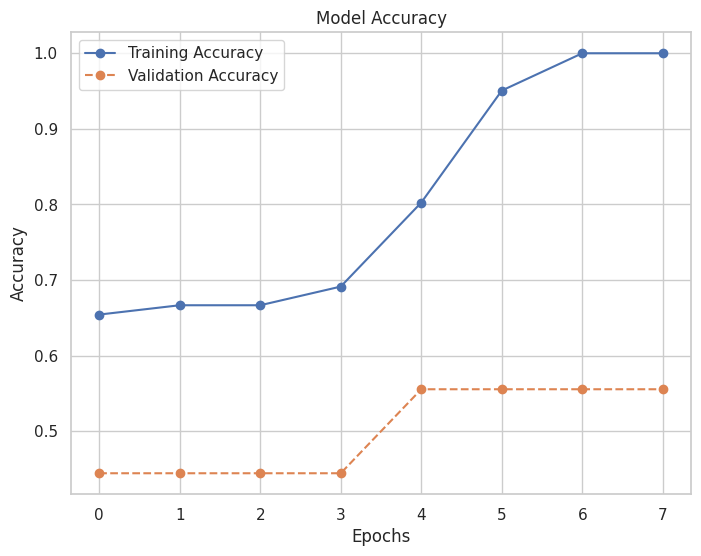

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_Crypto.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(history_Crypto.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


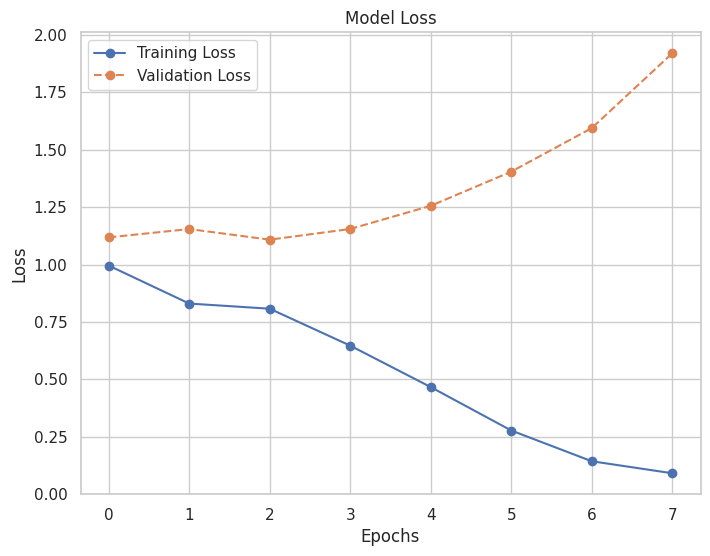

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model loss
plt.figure(figsize=(8, 6))
plt.plot(history_Crypto.history['loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(history_Crypto.history['val_loss'], label='Validation Loss', marker='o', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Assuming vocab, MAX_SEQUENCE_LENGTH, and y_train, y_test are defined
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab, embedding_dim, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes: 'positive', 'negative', 'neutral'

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 100)           46500     
                                                                 
 lstm (LSTM)                 (None, 30, 128)           117248    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 217511 (849.65 KB)
Trainable params: 217

In [28]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Define callbacks
epochs = 100
batch_size = 4
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./best_model/best_modelLSTM.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the LSTM model with callbacks
history_CryptoLSTM = model.fit(X_train, y_train, batch_size=batch_size, shuffle=True,
                               validation_split=0.1, epochs=epochs, verbose=1,
                               callbacks=[es, mc])


Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 0.8561 - accuracy: 0.6049
Epoch 1: val_accuracy improved from -inf to 0.44444, saving model to ./best_model/best_modelLSTM.h5
21/21 [==============================] - 13s 121ms/step - loss: 0.8561 - accuracy: 0.6049 - val_loss: 2.2649 - val_accuracy: 0.4444
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 1.1413 - accuracy: 0.6667
Epoch 2: val_accuracy did not improve from 0.44444
21/21 [==============================] - 1s 41ms/step - loss: 1.1413 - accuracy: 0.6667 - val_loss: 1.1279 - val_accuracy: 0.4444
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 0.8423 - accuracy: 0.6667
Epoch 3: val_accuracy did not improve from 0.44444
21/21 [==============================] - 1s 43ms/step - loss: 0.8423 - accuracy: 0.6667 - val_loss: 1.3016 - val_accuracy: 0.4444
Epoch 4/100
18/21 [========================>.....] - ETA: 0s - loss: 0.5496 - accuracy: 0.7083
Epoch 4: val_accuracy did 

In [57]:
from tensorflow.keras.models import load_model

saved_model_CryptoLSTM = load_model('./best_model/best_modelLSTM.h5')
train_acc_lstm = saved_model_CryptoLSTM.evaluate(X_train, y_train, verbose=1)
test_acc_lstm = saved_model_CryptoLSTM.evaluate(X_test, y_test, verbose=1)
train_accuracy_LSTM = train_acc_lstm[1] * 100
test_accuracy_LSTM = test_acc_lstm[1] * 100

formatted_train_accuracy_LSTM = "{:.2f}%".format(train_accuracy_LSTM)
formatted_test_accuracy_LSTM = "{:.2f}%".format(test_accuracy_LSTM)

print('LSTM Train Accuracy:', formatted_train_accuracy_LSTM)
print('LSTM Test Accuracy:', formatted_test_accuracy_LSTM)


2/2 [==============================] - 0s 8ms/step - loss: 1.4904 - accuracy: 0.6667
LSTM Train Accuracy: 64.44%
LSTM Test Accuracy: 66.67%


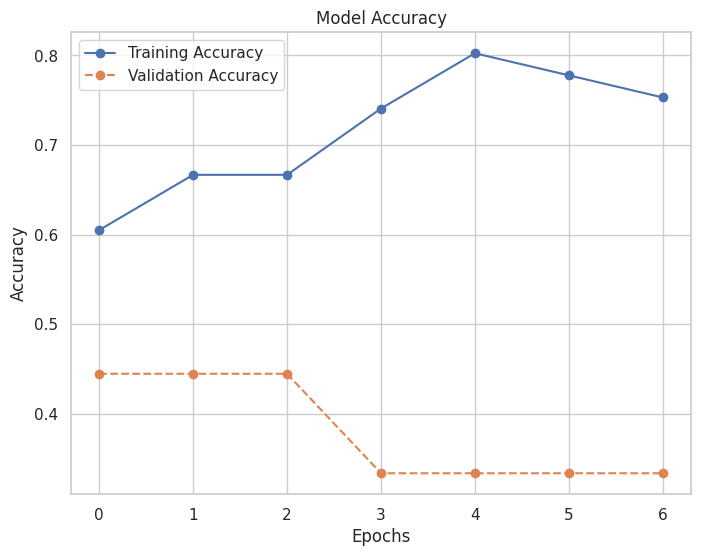

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_CryptoLSTM.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(history_CryptoLSTM.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


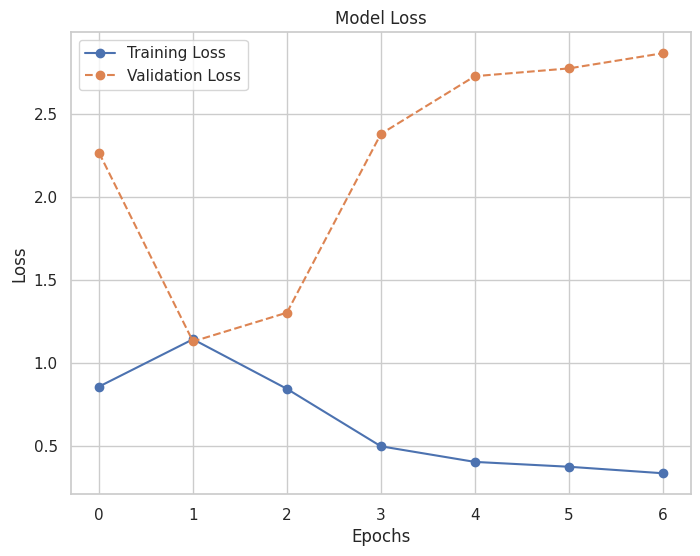

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model loss
plt.figure(figsize=(8, 6))
plt.plot(history_CryptoLSTM.history['loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(history_CryptoLSTM.history['val_loss'], label='Validation Loss', marker='o', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Define the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab, output_dim=100, input_length=MAX_SEQUENCE_LENGTH))
rnn_model.add(SimpleRNN(units=64, activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(units=32, activation='relu'))
rnn_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
rnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 100)           46500     
                                                                 
 simple_rnn (SimpleRNN)      (None, 30, 64)            10560     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 60197 (235.14 KB)
Trainable params: 60197 (235.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# Define callbacks
epochs = 100
batch_size = 4
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./best_model/best_modelRNN.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the RNN model with callbacks
history_CryptoRNN = rnn_model.fit(X_train, y_train, batch_size=batch_size, shuffle=True,
                                  validation_split=0.1, epochs=epochs, verbose=1,
                                  callbacks=[es, mc])


Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 0.5712 - accuracy: 0.5926
Epoch 1: val_accuracy improved from -inf to 0.44444, saving model to ./best_model/best_modelRNN.h5
21/21 [==============================] - 7s 140ms/step - loss: 0.5712 - accuracy: 0.5926 - val_loss: 0.6610 - val_accuracy: 0.4444
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 0.2614 - accuracy: 0.6667
Epoch 2: val_accuracy did not improve from 0.44444
21/21 [==============================] - 1s 71ms/step - loss: 0.2614 - accuracy: 0.6667 - val_loss: 1.2620 - val_accuracy: 0.4444
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.6667
Epoch 3: val_accuracy did not improve from 0.44444
21/21 [==============================] - 2s 80ms/step - loss: 0.0335 - accuracy: 0.6667 - val_loss: 0.9359 - val_accuracy: 0.4444
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.6667
Epoch 4: val_accuracy did no

In [58]:
from tensorflow.keras.models import load_model

saved_model_CryptoRNN = load_model('./best_model/best_modelRNN.h5')
train_acc_rnn = saved_model_CryptoRNN.evaluate(X_train, y_train, verbose=1)
test_acc_rnn = saved_model_CryptoRNN.evaluate(X_test, y_test, verbose=1)
train_accuracy_RNN = train_acc_rnn[1] * 100
test_accuracy_RNN = test_acc_rnn[1] * 100

formatted_train_accuracy_RNN = "{:.2f}%".format(train_accuracy_RNN)
formatted_test_accuracy_RNN = "{:.2f}%".format(test_accuracy_RNN)

print('RNN Train Accuracy:', formatted_train_accuracy_RNN)
print('RNN Test Accuracy:', formatted_test_accuracy_RNN)



2/2 [==============================] - 0s 22ms/step - loss: -0.0039 - accuracy: 0.6667
RNN Train Accuracy: 64.44%
RNN Test Accuracy: 66.67%


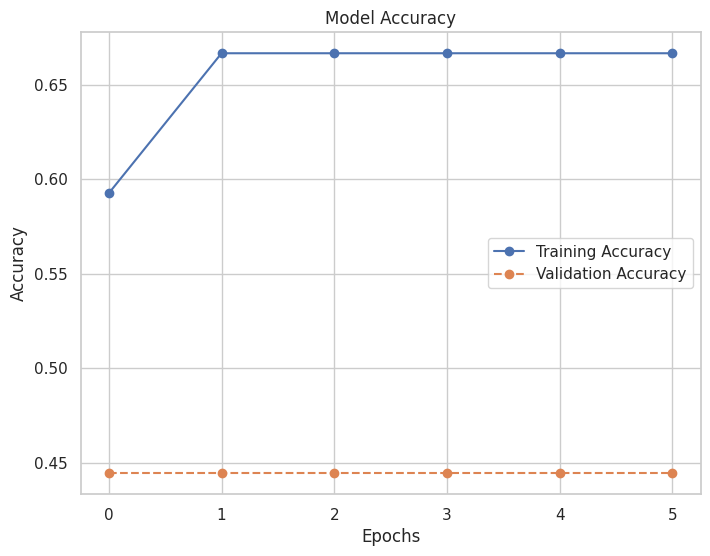

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_CryptoRNN.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(history_CryptoRNN.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


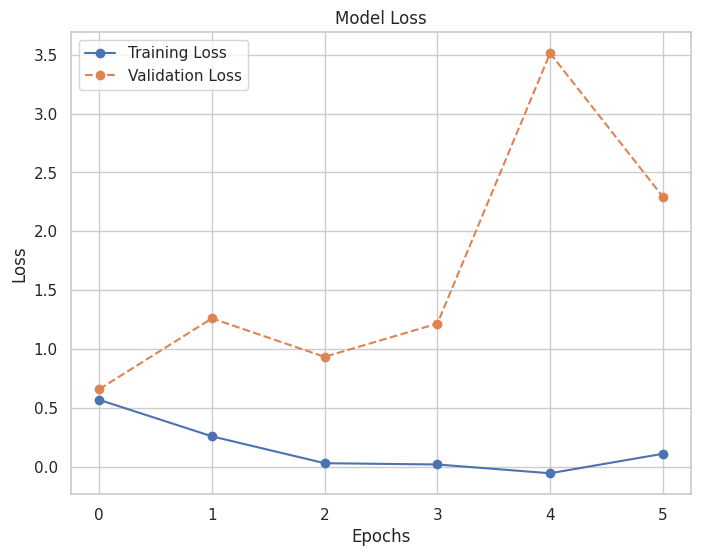

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model loss
plt.figure(figsize=(8, 6))
plt.plot(history_CryptoRNN.history['loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(history_CryptoRNN.history['val_loss'], label='Validation Loss', marker='o', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import numpy as np

# Load pre-trained Word2Vec model
from gensim.models import KeyedVectors

# Load pre-trained Word2Vec model
word2vec_model = KeyedVectors.load_word2vec_format('/drive/My Drive/NLP Project/Dataset/GoogleNews-vectors-negative300.bin', binary=True, limit=500000)

# Create an embedding matrix from the pre-trained Word2Vec model
embedding_matrix = np.zeros((len(word2vec_model.index_to_key), word2vec_model.vector_size))
for i, word in enumerate(word2vec_model.index_to_key):
    embedding_vector = word2vec_model[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define the neural network model
Word2Vec_CNNmodel = Sequential()

# Add an Embedding layer with pre-trained Word2Vec embeddings
vocab_size, embedding_dim = embedding_matrix.shape
input_length = MAX_SEQUENCE_LENGTH  # Define MAX_SEQUENCE_LENGTH appropriately
Word2Vec_CNNmodel.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=input_length, trainable=False))

# Add Conv1D layers
filters = 128
kernel_size = 5
Word2Vec_CNNmodel.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
Word2Vec_CNNmodel.add(GlobalMaxPooling1D())

# Add Dense layers
hidden_units = 64
output_units = len(le.classes_)
Word2Vec_CNNmodel.add(Dense(hidden_units, activation='relu'))
Word2Vec_CNNmodel.add(Dropout(0.5))
Word2Vec_CNNmodel.add(Dense(output_units, activation='softmax'))

# Compile the model
Word2Vec_CNNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Word2Vec_CNNmodel.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 300)           150000000 
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 128)           192128    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                      

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
epochs = 100
batch_size = 4
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./best_model/best_modelCNN_Word2Vec.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Train the model with callbacks
history_Cryptoword2vec = Word2Vec_CNNmodel.fit(X_train, y_train, batch_size=batch_size, shuffle=True,
                                       validation_split=0.1, epochs=epochs, verbose=1,
                                       callbacks=[es, mc])


Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 1.0225 - accuracy: 0.6173
Epoch 1: val_accuracy improved from -inf to 0.44444, saving model to ./best_model/best_modelCNN_Word2Vec.h5
21/21 [==============================] - 4s 141ms/step - loss: 1.0225 - accuracy: 0.6173 - val_loss: 1.1690 - val_accuracy: 0.4444
Epoch 2/100
14/21 [===================>..........] - ETA: 0s - loss: 0.8023 - accuracy: 0.6786
Epoch 2: val_accuracy did not improve from 0.44444
21/21 [==============================] - 0s 6ms/step - loss: 0.7912 - accuracy: 0.6914 - val_loss: 1.1221 - val_accuracy: 0.4444
Epoch 3/100
15/21 [====================>.........] - ETA: 0s - loss: 0.6176 - accuracy: 0.7167
Epoch 3: val_accuracy improved from 0.44444 to 0.55556, saving model to ./best_model/best_modelCNN_Word2Vec.h5
21/21 [==============================] - 5s 239ms/step - loss: 0.6260 - accuracy: 0.7407 - val_loss: 1.1743 - val_accuracy: 0.5556
Epoch 4/100
15/21 [====================>.........] - E

In [59]:
from tensorflow.keras.models import load_model

saved_model_Word2VecCNN = load_model('./best_model/best_modelCNN_Word2Vec.h5')
train_acc_word2vec_cnn = saved_model_Word2VecCNN.evaluate(X_train, y_train, verbose=1)
test_acc_word2vec_cnn = saved_model_Word2VecCNN.evaluate(X_test, y_test, verbose=1)
train_accuracy_word2vec = train_acc_word2vec_cnn[1] * 100
test_accuracy_word2vec = test_acc_word2vec_cnn[1] * 100

formatted_train_accuracy_word2vec = "{:.2f}%".format(train_accuracy_word2vec)
formatted_test_accuracy_word2vec = "{:.2f}%".format(test_accuracy_word2vec)

print('Word2Vec CNN Train Accuracy:', formatted_train_accuracy_word2vec)
print('Word2Vec CNN Test Accuracy:', formatted_test_accuracy_word2vec)



2/2 [==============================] - 0s 11ms/step - loss: 0.7321 - accuracy: 0.6923
Word2Vec CNN Train Accuracy: 82.22%
Word2Vec CNN Test Accuracy: 69.23%


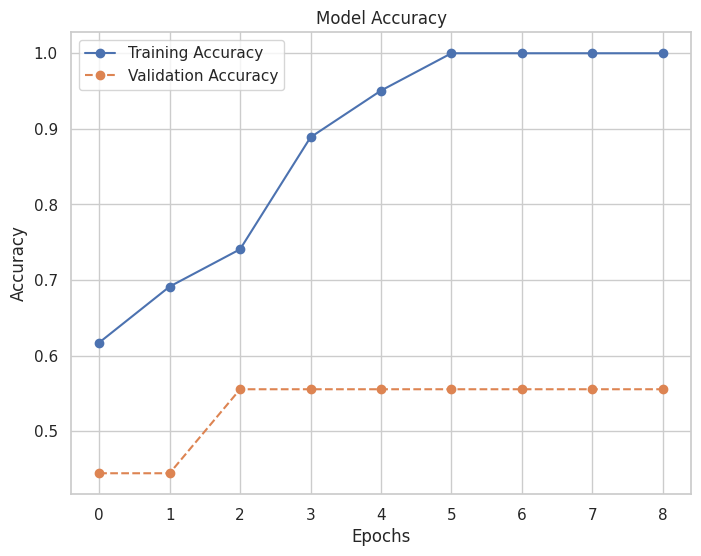

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_Cryptoword2vec.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(history_Cryptoword2vec.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


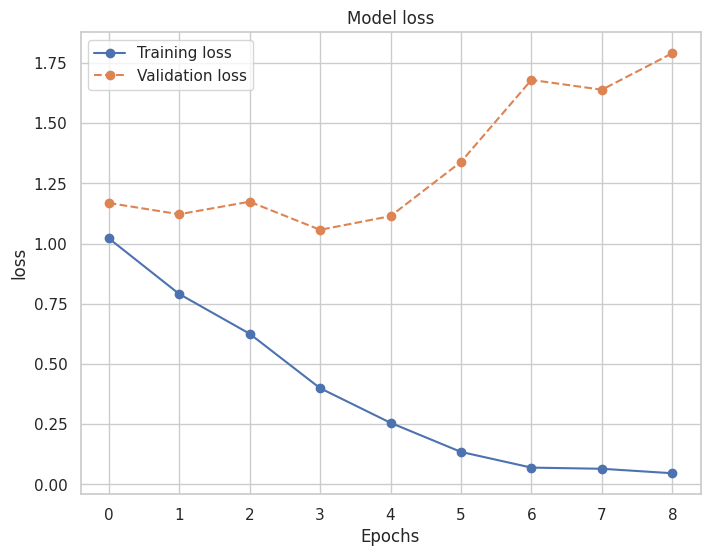

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting model accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_Cryptoword2vec.history['loss'], label='Training loss', marker='o', linestyle='-')
plt.plot(history_Cryptoword2vec.history['val_loss'], label='Validation loss', marker='o', linestyle='--')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()


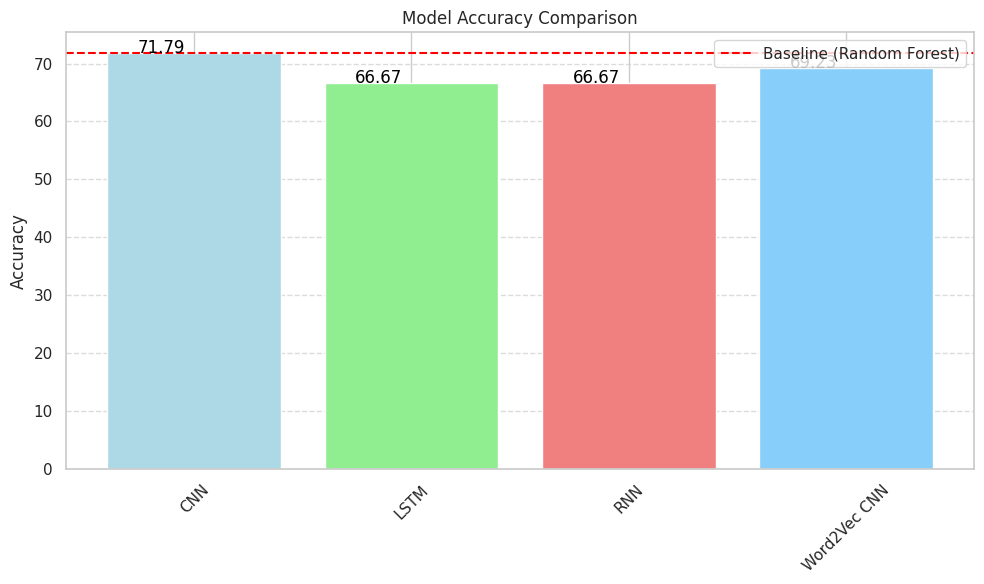

In [61]:
import matplotlib.pyplot as plt

accuracies = [formatted_test_accuracy_CNN, formatted_test_accuracy_LSTM,
              formatted_test_accuracy_RNN, formatted_test_accuracy_word2vec]
models = ['CNN', 'LSTM', 'RNN', 'Word2Vec CNN']

# Baseline accuracy (Random Forest)
baseline_accuracy = formatted_accuracy_rf  # Replace this with your baseline accuracy

# Convert accuracy percentages to float values
accuracies_float = [float(acc.strip('%')) for acc in accuracies]
baseline_accuracy_float = float(baseline_accuracy.strip('%'))

# Plotting the accuracies against the baseline
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies_float, color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.axhline(y=baseline_accuracy_float, color='red', linestyle='--', label='Baseline (Random Forest)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding accuracy values on each bar
for bar, acc in zip(bars, accuracies_float):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 0.02, f'{acc:.2f}', ha='center', color='black')

plt.legend()
plt.tight_layout()
plt.show()
